<a href="https://colab.research.google.com/github/bintangsholu21/PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**

**Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi**

---

Nama : Muhammad Bintang Sholu Firmansyah

Kelas : TI-3G

No Absen : 16

NIM : 2141720101

---

### **Praktikum**

**1. Buat Gamma Correction sesuai dengan petunjuk berikut Percobaan ini akan meminta anda membuat Gamma Correction.**

Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

In [2]:
# Import Library

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from math import log10, sqrt
import glob

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


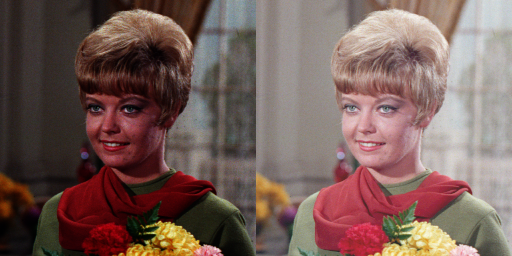

In [4]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

----

**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.

Masukan Nilai Bit Depth : 3


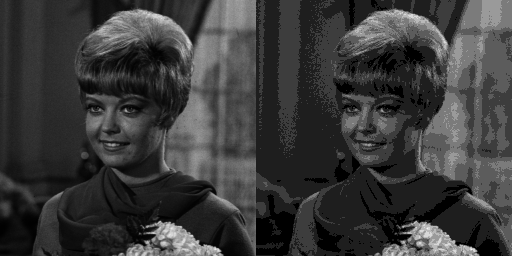

In [6]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

try :
  bit = int(input('Masukan Nilai Bit Depth : '))
except ValueError :
  print('Number Error')

level = 255/(2**bit)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)


final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

---

**3. Buat Modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).


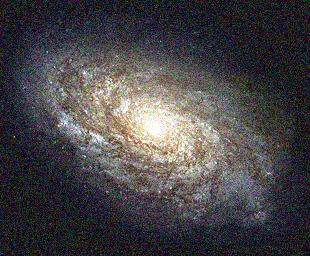

In [10]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [11]:
# PSNR

import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)


PSNR
------------------------------
Masukan jumlah citra average: 60
Nilai PSNR: 
30.32934910129182


In [12]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.545213083830546 (dB)


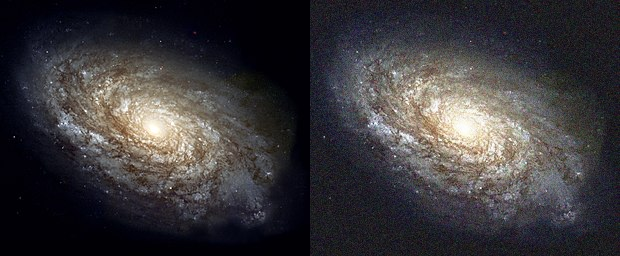

In [13]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### Jumlah Citra di Average 5

Nilai PSNR adalah 27.532042458318188 (dB)


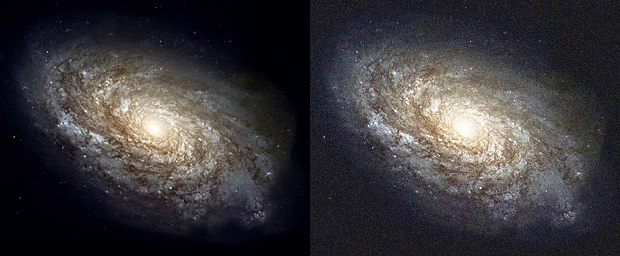

In [14]:
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### Jumlah Citra di Average 30

Nilai PSNR adalah 27.525924599448047 (dB)


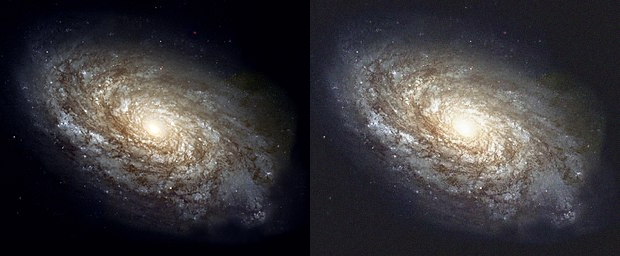

In [15]:
dst = cv_img[0]
noise_number = 30
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### Jumlah Citra di Average 60

Nilai PSNR adalah 27.498209833990586 (dB)


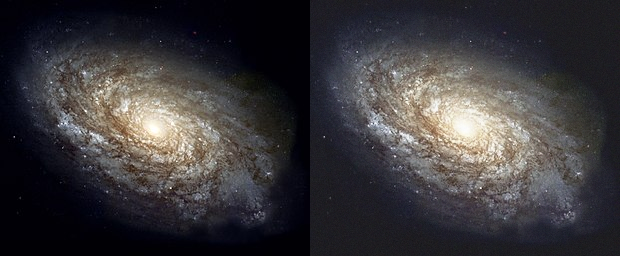

In [16]:
dst = cv_img[0]
noise_number = 60
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### Jumlah Citra di Average 80

Nilai PSNR adalah 27.506942764732756 (dB)


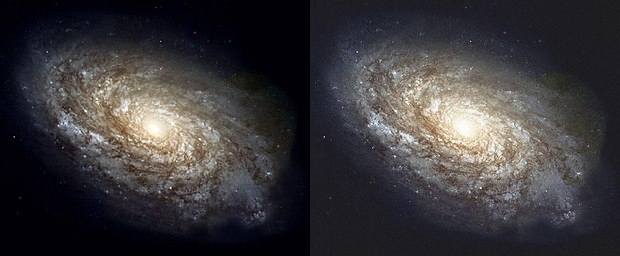

In [17]:
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

#### Jumlah Citra di Average 100

Nilai PSNR adalah 27.506187084765582 (dB)


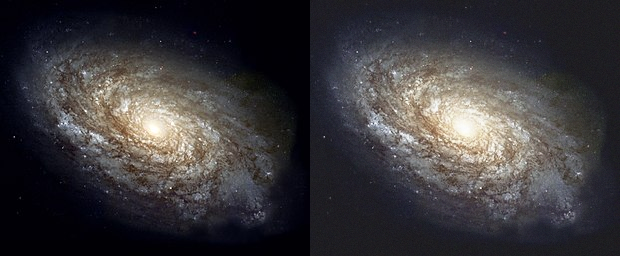

In [18]:
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

***Kesimpulan***

Berdasarkan pengukuran PSNR, dapat disimpulkan bahwa peningkatan jumlah gambar yang digunakan dalam proses pengurangan noise cenderung meningkatkan nilai PSNR. Dengan menggunakan lebih banyak gambar yang mengandung noise Gaussian, gambar yang telah diperbaiki dari noise akan semakin mendekati gambar asli dan tingkat kebisingan akan berkurang. Namun, ada batas atas dalam meningkatkan PSNR dengan menambahkan sejumlah besar frame, yang mungkin tidak akan menghasilkan peningkatan yang signifikan dalam kualitas hasil denoising.

---
**4. Buat Image Masking**

Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

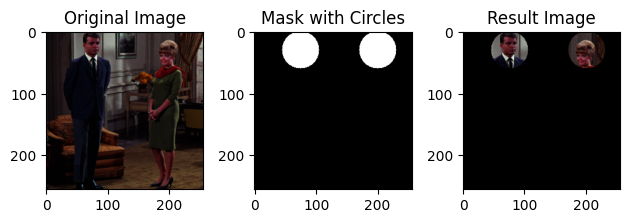

In [19]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros_like(img)

center_coordinates1 = (75, 30)
radius1 = 30
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

center_coordinates2 = (200, 30)
radius2 = 30
cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = cv.bitwise_and(img, mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()